In [115]:
#import packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter


In [116]:
 races = ['Total!!Population of one race!!White alone',
           'Total!!Population of one race!!Black or African American alone',
           'Total!!Population of one race!!American Indian and Alaska Native alone',
           'Total!!Population of one race!!Asian alone',
           'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander alone',
           'Total!!Population of one race!!Some Other Race alone',
           'Total!!Two or More Races!!Population of two races!!White; Black or African American',
           'Total!!Two or More Races!!Population of two races!!White; American Indian and Alaska Native',
           'Total!!Two or More Races!!Population of two races!!White; Asian',
           'Total!!Two or More Races!!Population of two races!!White; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!White; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!Black or African American; American Indian and Alaska Native',
           'Total!!Two or More Races!!Population of two races!!Black or African American; Asian',
           'Total!!Two or More Races!!Population of two races!!Black or African American; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!Black or African American; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of two races!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!Asian; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; American Indian and Alaska Native',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; Asian',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of three races!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!White; American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!White; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Black or African American; American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of three races!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!Black or African American; American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Black or African American; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!Black or African American; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!White; American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!Black or African American; American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of six races!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race']
            
        
races2 = ['White alone',
       'Black or African American alone',
       'American Indian and Alaska Native alone',
       'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone',
       'White; Black or African American',
       'White; American Indian and Alaska Native',
       'White; Asian',
       'White; Native Hawaiian and Other Pacific Islander',
       'White; Some Other Race',
       'Black or African American; American Indian and Alaska Native',
       'Black or African American; Asian',
       'Black or African American; Native Hawaiian and Other Pacific Islander',
       'Black or African American; Some Other Race',
       'American Indian and Alaska Native; Asian',
       'American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
       'American Indian and Alaska Native; Some Other Race',
       'Asian; Native Hawaiian and Other Pacific Islander',
       'Asian; Some Other Race',
       'Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Black or African American; American Indian and Alaska Native',
       'White; Black or African American; Asian',
       'White; Black or African American; Native Hawaiian and Other Pacific Islander',
       'White; Black or African American; Some Other Race',
       'White; American Indian and Alaska Native; Asian',
       'White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
       'White; American Indian and Alaska Native; Some Other Race',
       'White; Asian; Native Hawaiian and Other Pacific Islander',
       'White; Asian; Some Other Race',
       'White; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'Black or African American; American Indian and Alaska Native; Asian',
       'Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
       'Black or African American; American Indian and Alaska Native; Some Other Race',
       'Black or African American; Asian; Native Hawaiian and Other Pacific Islander',
       'Black or African American; Asian; Some Other Race',
       'Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
       'American Indian and Alaska Native; Asian; Some Other Race',
       'American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Black or African American; American Indian and Alaska Native; Asian',
       'White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
       'White; Black or African American; American Indian and Alaska Native; Some Other Race',
       'White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander',
       'White; Black or African American; Asian; Some Other Race',
       'White; Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
       'White; American Indian and Alaska Native; Asian; Some Other Race',
       'White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
       'Black or African American; American Indian and Alaska Native; Asian; Some Other Race',
       'Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
       'White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race',
       'White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race']
    
    

Counter({'Total!!Population of one race!!White alone': 881, 'Total!!Population of one race!!Black or African American alone': 264, 'Total!!Population of one race!!Asian alone': 115, 'Total!!Population of one race!!Some Other Race alone': 43, 'Total!!Two or More Races!!Population of two races!!White; Asian': 28, 'Total!!Two or More Races!!Population of two races!!White; Black or African American': 15, 'Total!!Two or More Races!!Population of two races!!White; American Indian and Alaska Native': 15, 'Total!!Population of one race!!American Indian and Alaska Native alone': 14, 'Total!!Two or More Races!!Population of three races!!White; Black or African American; American Indian and Alaska Native': 9, 'Total!!Two or More Races!!Population of two races!!White; Some Other Race': 7, 'Total!!Two or More Races!!Population of two races!!Black or African American; Asian': 7, 'Total!!Two or More Races!!Population of two races!!Black or African American; American Indian and Alaska Native': 5, 'Tot

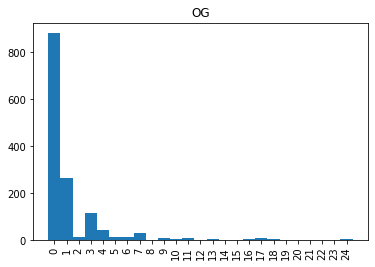

FileNotFoundError: [Errno 2] No such file or directory: 'data/alameda/swap2/histograms/race/orig.png'

<Figure size 432x288 with 0 Axes>

In [70]:
def make_hist(county, directory, data_type, column):
    
    
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]
    for key1, value1 in df_orig.iteritems():
        if(key1 == column):
            labels, values = zip(*Counter(value1).items())
            indexes_all = np.arange(len(labels))
            indexes = indexes_all
            print(Counter(value1))
            width = 1
            plt.bar(indexes, values, width)
            plt.xticks(indexes, rotation='vertical')
            plt.title("OG")
            plt.show()
            plt.savefig('data/'+county+'/'+data_type+'/histograms/'+column+'/orig.png')

    
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            print(filename)
            df = pd.read_csv (directory+filename)
            for key, value in df.iteritems():
                if(key == column):
                    labels, values = zip(*Counter(value).items())
                    indexes = np.arange(len(labels))
                    #print(Counter(value))
                    width = 1
                    plt.bar(indexes, values, width)
                    plt.xticks(indexes_all, rotation='vertical')
                    plt.show()
                    plt.savefig('data/'+county+'/'+data_type+'/histograms/'+column+'/'+(filename[:len(filename)-4])+'.png')
                    
                    
make_hist('alameda','../swapping_algorithm/swap_runs/alameda/swaprun2/', 'swap2', 'race')

In [106]:

def make_dp(county, file):
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]
    for index, row in df_orig.iterrows():
        d = row['race']
        h = row['hispanic']
        if d in races and h==1:
            df_orig.at[index, 'race'] = races.index(d)+63
        elif d in races and h==0:
            df_orig.at[index, 'race'] = races.index(d)
    labels_all = []
    vals_all = []

    #get list of occurrences by race - orig
    for key1, value1 in df_orig.iteritems():
        if(key1 == 'race'):
            labs, vals = zip(*Counter(value1).items())
            labs = list(labs)
            vals = list(vals)
            for i in range(0, 126):
                if i not in labs:
                    labels_all.append(i)
                    vals_all.append(0)
                elif i in labs:
                    pos = labs.index(i)
                    labels_all.append(i)
                    vals_all.append(vals[pos])   
    labels_all = np.arange(0,126,1)
    
    
    
    df2 = pd.read_csv(file)      #dataframe corresponding to new dataset, with 63 rows (for each race) and 2 cols (for H/NH)
    hisp = df2['Hispanic'].tolist()
    nonhisp = df2['Nonhispanic'].tolist()
    
    nonhisp.extend(hisp)
    
    vals2_all = nonhisp

#     print(labels_all)
#     print(vals_all)
#     print(vals2_all)
    
    f = plt.figure()
    f.set_figwidth(25)           
    x = np.arange(126)*4
    #print(x)
    ax1 = plt.subplot(1,1,1) 
    w = 1.25
    indexes_all = np.arange(0,126,1)

    plt.xticks(x, indexes_all, rotation='vertical')
    ax1.bar(4*indexes_all, vals_all, width=w, color='b', align='center', label="Original Dataset")
    ax1.bar(4*indexes_all+1, vals2_all, width=w, color='orange', align='center', label='DP')
    ax1.legend()
    ax1.set_yscale("log")




In [90]:

def make_dp_raceonly(county, file):
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]
    for index, row in df_orig.iterrows():
        d = row['race']
        h = row['hispanic']
        if d in races and h==1:
            df_orig.at[index, 'race'] = races.index(d)
        elif d in races and h==0:
            df_orig.at[index, 'race'] = races.index(d)
    labels_all = []
    vals_all = []

    #get list of occurrences by race - orig
    for key1, value1 in df_orig.iteritems():
        if(key1 == 'race'):
            labs, vals = zip(*Counter(value1).items())
            labs = list(labs)
            vals = list(vals)
            for i in range(0, 63):
                if i not in labs:
                    labels_all.append(i)
                    vals_all.append(0)
                elif i in labs:
                    pos = labs.index(i)
                    labels_all.append(i)
                    vals_all.append(vals[pos])   
    labels_all = np.arange(0,63,1)
    
    
    
    df2 = pd.read_csv(file)      #dataframe corresponding to new dataset, with 63 rows (for each race) and 2 cols (for H/NH)
    hisp = df2['Hispanic'].tolist()
    nonhisp = df2['Nonhispanic'].tolist()
    
    vals2_all = []
    
    for i in range(0, len(hisp)): 
        vals2_all.append(hisp[i]+nonhisp[i])

#     print(labels_all)
#     print(vals_all)
#     print(vals2_all)
    
    f = plt.figure()
    f.set_figwidth(25)           
    x = np.arange(63)*4
    #print(x)
    ax1 = plt.subplot(1,1,1) 
    w = 1.25
    indexes_all = np.arange(0,63,1)

    plt.xticks(x, indexes_all, rotation='vertical')
    ax1.bar(4*indexes_all, vals_all, width=w, color='b', align='center', label="Original Dataset")
    ax1.bar(4*indexes_all+1, vals2_all, width=w, color='orange', align='center', label='DP')
    ax1.legend()
    ax1.set_yscale("log")




In [111]:
def make_swap(county, file):
    
    #ORIGINAL DATA
    
    #import original dataset & delete unnecessary rows
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]
    #replace race w/ value 0-126; where 0-62 represent non-hispanic and 63-126 represent hispanic
    for index, row in df_orig.iterrows():
        d = row['race']
        h = row['hispanic']
        #if hispanic, increment to 63-126 range
        if d in races and h==1:
            df_orig.at[index, 'race'] = races.index(d)+63
        #else, 0-63 range
        elif d in races and h==0:
            df_orig.at[index, 'race'] = races.index(d)
    
    
    #get list of occurrences by race using counter - original dataset
    #LABELS_ALL = race numbers 0-126
    #VALUES_ALL = associated counts for race numbers 0-126
    labels_all = []
    vals_all = []
    for key1, value1 in df_orig.iteritems():
        if(key1 == 'race'):
            labs, vals = zip(*Counter(value1).items())
            labs = list(labs)
            vals = list(vals)
            #for each race value, get number of occurences and append label and value of each
            for i in range(0, 126):
                if i not in labs:
                    labels_all.append(i)
                    vals_all.append(0)
                elif i in labs:
                    pos = labs.index(i)
                    labels_all.append(i)
                    vals_all.append(vals[pos])   
    labels_all = np.arange(0,126,1)
    
    #SWAPPING DATA
    
    #import original dataset & delete unnecessary rows
    df2 = pd.read_csv(file)
    for index, row in df2.iterrows():
        d = row['race']
        df2.at[index, 'race'] = races2.index(d)
    #replace race w/ value 0-126; where 0-62 represent non-hispanic and 63-126 represent hispanic
    for index, row in df2.iterrows():
        d = row['race']
        h = row['hispanic']
        #if hispanic, increment to 63-126 range
        #0-62 represent non-hispanic and 63-126 represent hispanic
        if h==1:
            df2.at[index, 'race'] = d+63
    

    #get list of occurrences by race using counter - de-identified swapping dataset
    #LABELS2_ALL = race numbers 0-126
    #VALUES2_ALL = associated counts for race numbers 0-126
    labels2_all = []
    vals2_all = []    
    for key, value in df2.iteritems():
        if(key == 'race'):
            labels2, values2 = zip(*Counter(value).items())
            labels2=list(labels2)
            values2 = list(values2)
            for i in range(0, 126):
                if i not in labels2:
                    labels2_all.append(i)
                    vals2_all.append(0)
                elif i in labels2:
                    pos = labels2.index(i)
                    labels2_all.append(i)
                    vals2_all.append(values2[pos])
                    
#     print(labels_all)
#     print(vals_all)
#     print(vals2_all)
                    
    f = plt.figure()
    f.set_figwidth(25)           
    x = np.arange(126)*4
    ax1 = plt.subplot(1,1,1) 
    w = 1.25
    indexes_all = np.arange(0,126,1)

    plt.xticks(x, indexes_all, rotation='vertical')
    ax1.bar(4*indexes_all, vals_all, width=w, color='b', align='center', label="Original Dataset")
    ax1.bar(4*indexes_all+1, vals2_all, width=w, color='orange', align='center', label='Swapping')
    ax1.legend()
#     ax1.set_yscale("log")
  

In [113]:
def make_swap2(county, file):
    
    #ORIGINAL DATA
    
    #import original dataset & delete unnecessary rows
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]
    #replace race w/ value 0-126; where 0-62 represent non-hispanic and 63-126 represent hispanic
    for index, row in df_orig.iterrows():
        d = row['race']
        h = row['hispanic']
        #if hispanic, increment to 63-126 range
        if d in races and h==1:
            df_orig.at[index, 'race'] = races.index(d)+63
        #else, 0-63 range
        elif d in races and h==0:
            df_orig.at[index, 'race'] = races.index(d)
    
    
    #get list of occurrences by race using counter - original dataset
    #LABELS_ALL = race numbers 0-126
    #VALUES_ALL = associated counts for race numbers 0-126
    labels_all = []
    vals_all = []
    for key1, value1 in df_orig.iteritems():
        if(key1 == 'race'):
            labs, vals = zip(*Counter(value1).items())
            labs = list(labs)
            vals = list(vals)
            #for each race value, get number of occurences and append label and value of each
            for i in range(0, 126):
                if i not in labs:
                    labels_all.append(i)
                    vals_all.append(0)
                elif i in labs:
                    pos = labs.index(i)
                    labels_all.append(i)
                    vals_all.append(vals[pos])   
    labels_all = np.arange(0,126,1)
    
    #SWAPPING DATA
    
    #import original dataset & delete unnecessary rows
    df2 = pd.read_csv(file)
    #replace race w/ value 0-126; where 0-62 represent non-hispanic and 63-126 represent hispanic
    for index, row in df2.iterrows():
        d = row['race']
        h = row['hispanic']
        #if hispanic, increment to 63-126 range
        #0-62 represent non-hispanic and 63-126 represent hispanic
        if h==1:
            df2.at[index, 'race'] = d+63
    

    #get list of occurrences by race using counter - de-identified swapping dataset
    #LABELS2_ALL = race numbers 0-126
    #VALUES2_ALL = associated counts for race numbers 0-126
    labels2_all = []
    vals2_all = []    
    for key, value in df2.iteritems():
        if(key == 'race'):
            labels2, values2 = zip(*Counter(value).items())
            labels2=list(labels2)
            values2 = list(values2)
            for i in range(0, 126):
                if i not in labels2:
                    labels2_all.append(i)
                    vals2_all.append(0)
                elif i in labels2:
                    pos = labels2.index(i)
                    labels2_all.append(i)
                    vals2_all.append(values2[pos])
                    
#     print(labels_all)
#     print(vals_all)
#     print(vals2_all)
                    
    f = plt.figure()
    f.set_figwidth(25)           
    x = np.arange(126)*4
    ax1 = plt.subplot(1,1,1) 
    w = 1.25
    indexes_all = np.arange(0,126,1)

    plt.xticks(x, indexes_all, rotation='vertical')
    ax1.bar(4*indexes_all, vals_all, width=w, color='b', align='center', label="Original Dataset")
    ax1.bar(4*indexes_all+1, vals2_all, width=w, color='orange', align='center', label='Swapping')
    ax1.legend()
#     ax1.set_yscale("log")
  

In [73]:
def make_swap_raceonly(county, file):
    
    #ORIGINAL DATA
    
    #import original dataset & delete unnecessary rows
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]
    #replace race w/ value 0-126; where 0-62 represent non-hispanic and 63-126 represent hispanic
    for index, row in df_orig.iterrows():
        d = row['race']
        h = row['hispanic']
        #if hispanic, increment to 63-126 range
        if d in races and h==1:
            df_orig.at[index, 'race'] = races.index(d)
        #else, 0-63 range
        elif d in races and h==0:
            df_orig.at[index, 'race'] = races.index(d)
    
    #get list of occurrences by race using counter - original dataset
    #LABELS_ALL = race numbers 0-126
    #VALUES_ALL = associated counts for race numbers 0-126
    labels_all = []
    vals_all = []
    for key1, value1 in df_orig.iteritems():
        if(key1 == 'race'):
            labs, vals = zip(*Counter(value1).items())
            labs = list(labs)
            vals = list(vals)
            #for each race value, get number of occurences and append label and value of each
            for i in range(0, 63):
                if i not in labs:
                    labels_all.append(i)
                    vals_all.append(0)
                elif i in labs:
                    pos = labs.index(i)
                    labels_all.append(i)
                    vals_all.append(vals[pos])   
    labels_all = np.arange(0,63,1)
    
    #SWAPPING DATA
    
    #import original dataset & delete unnecessary rows
    df2 = pd.read_csv(file)

    #get list of occurrences by race using counter - de-identified swapping dataset
    #LABELS2_ALL = race numbers 0-126
    #VALUES2_ALL = associated counts for race numbers 0-126
    labels2_all = []
    vals2_all = []    
    for key, value in df2.iteritems():
        if(key == 'race'):
            labels2, values2 = zip(*Counter(value).items())
            labels2=list(labels2)
            values2 = list(values2)
            for i in range(0, 63):
                if i not in labels2:
                    labels2_all.append(i)
                    vals2_all.append(0)
                elif i in labels2:
                    pos = labels2.index(i)
                    labels2_all.append(i)
                    vals2_all.append(values2[pos])
                    
#     print(labels_all)
#     print(vals_all)
#     print(vals2_all)
                    
    f = plt.figure()
    f.set_figwidth(25)           
    ax1 = plt.subplot(1,1,1) 
    w = 1.25
    x = np.arange(63)*4
    indexes_all = np.arange(0,63,1)

    plt.xticks(x, indexes_all, rotation='vertical')
    ax1.bar(4*indexes_all, vals_all, width=w, color='b', align='center', label="Original Dataset")
    ax1.bar(4*indexes_all+1, vals2_all, width=w, color='orange', align='center', label='Swapping')
    ax1.legend()
#     ax1.set_yscale("log")
  

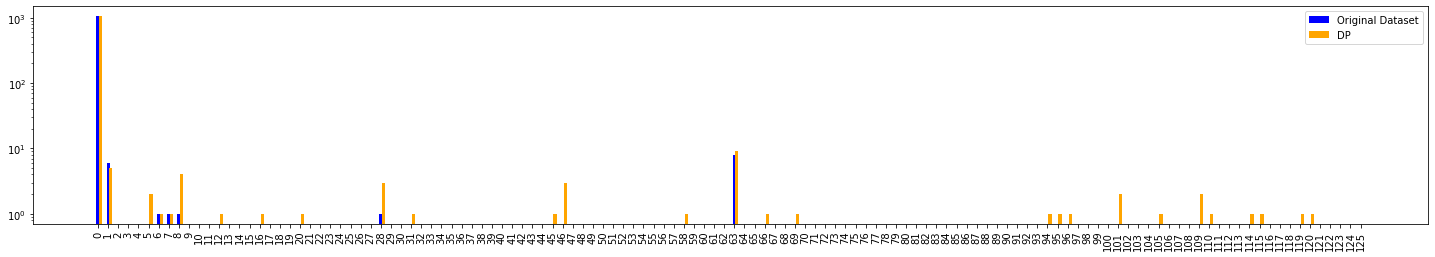

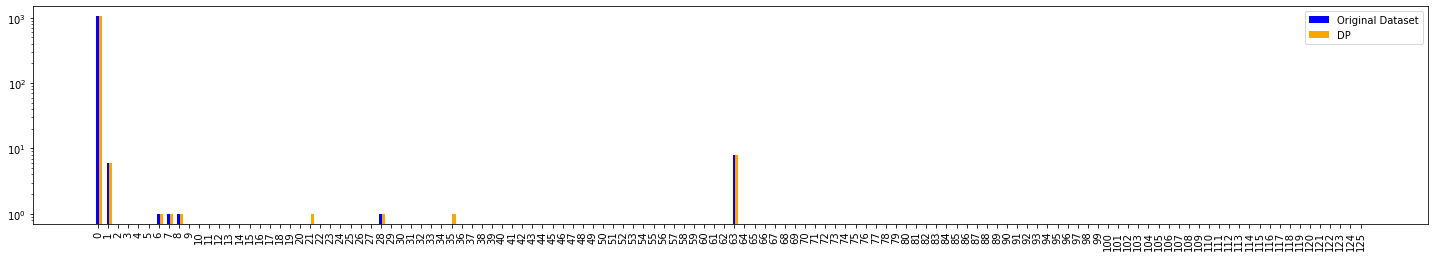

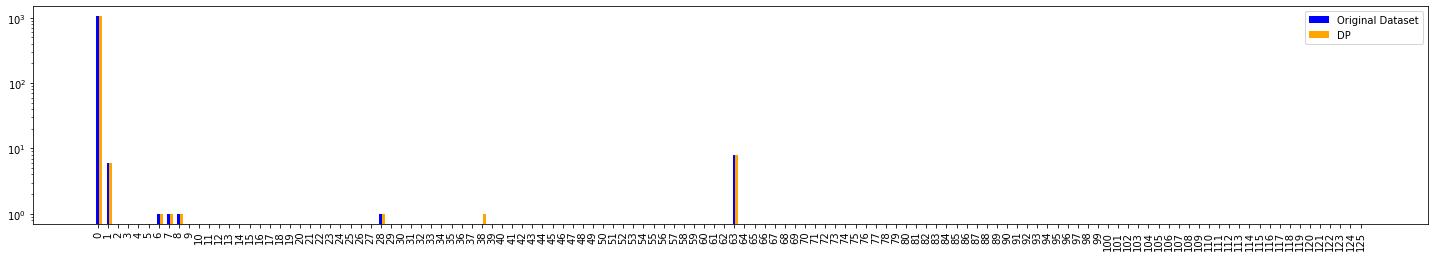

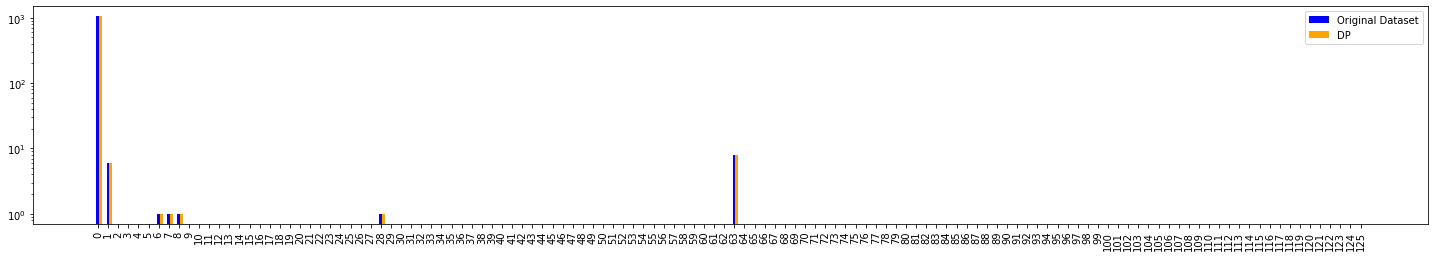

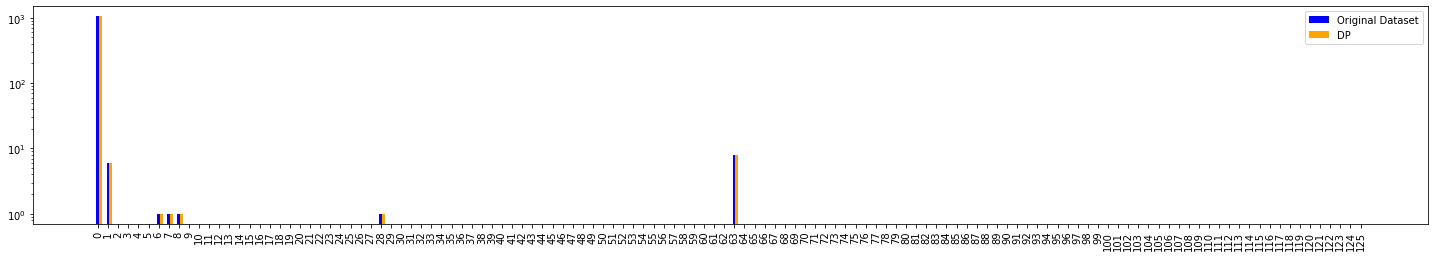

In [107]:
make_dp('armstrong', '../dp/newdp_runs2/armstrong/dprun_1.96_91.csv')
make_dp('armstrong', '../dp/newdp_runs2/armstrong/dprun_3.96_91.csv')    
make_dp('armstrong', '../dp/newdp_runs2/armstrong/dprun_5.96_91.csv')
make_dp('armstrong', '../dp/newdp_runs2/armstrong/dprun_7.96_91.csv')    
make_dp('armstrong', '../dp/newdp_runs2/armstrong/dprun_9.96_91.csv')

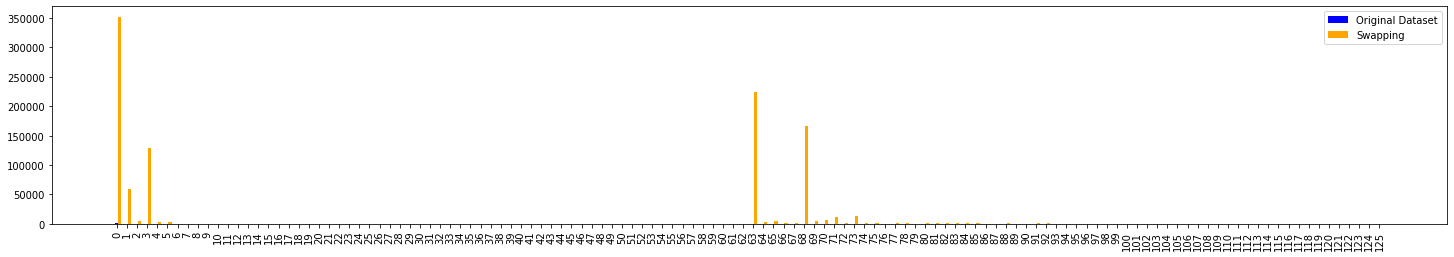

In [117]:
make_swap('alameda', '../swapping/state_data/california.csv')


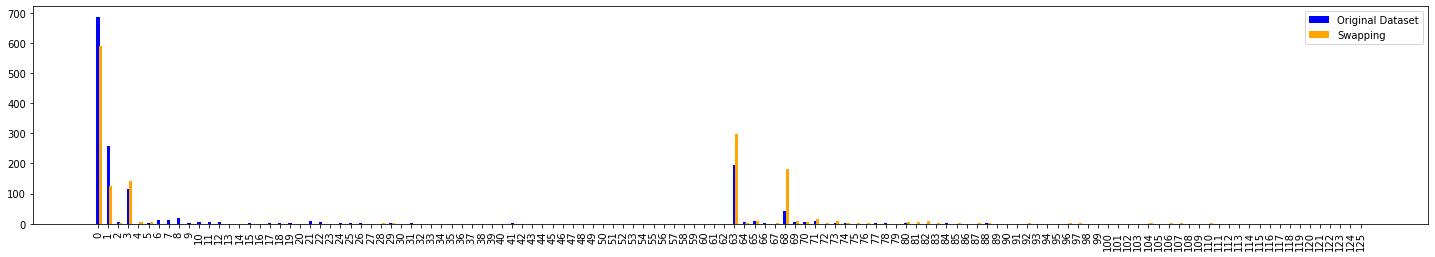

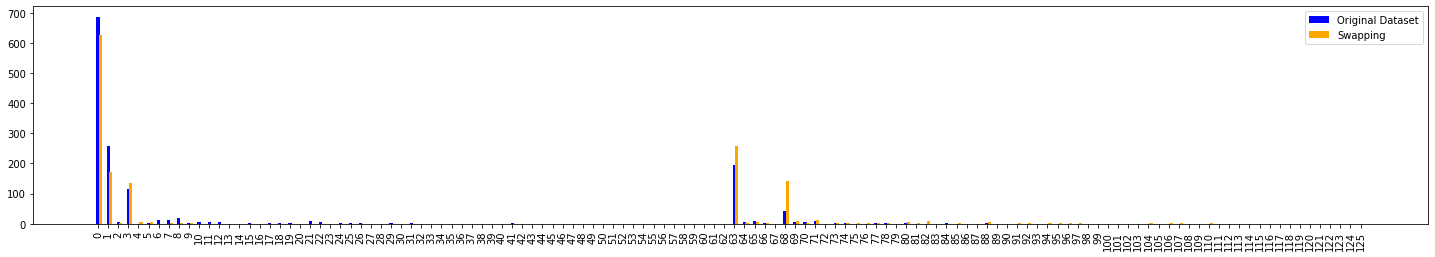

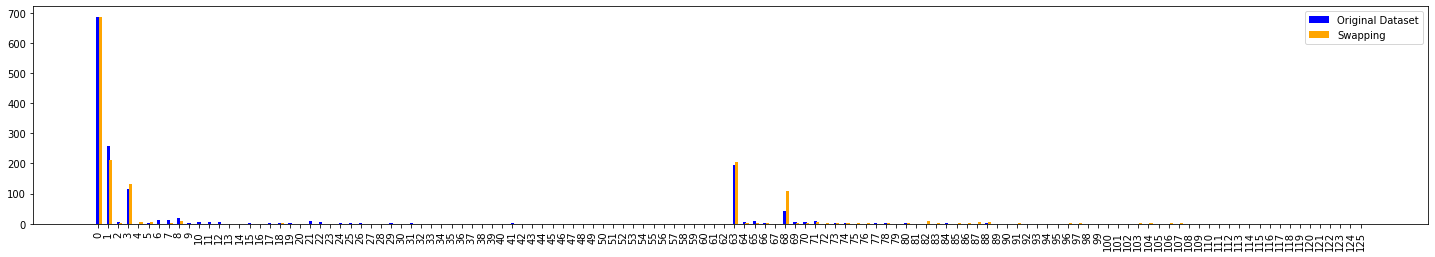

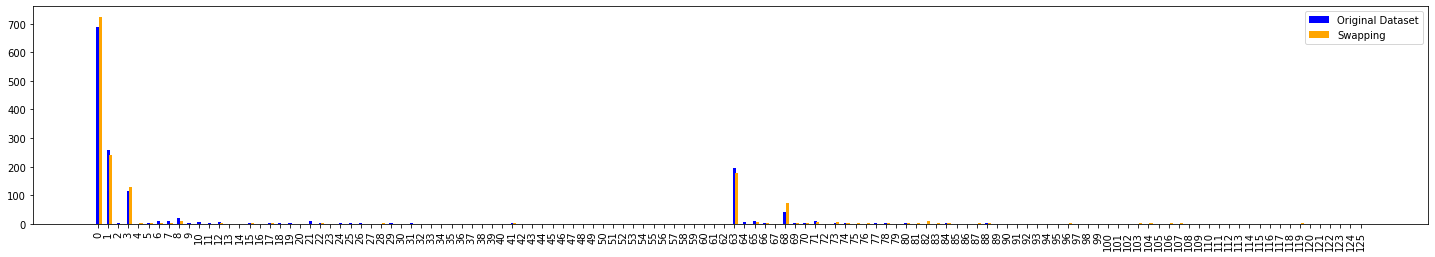

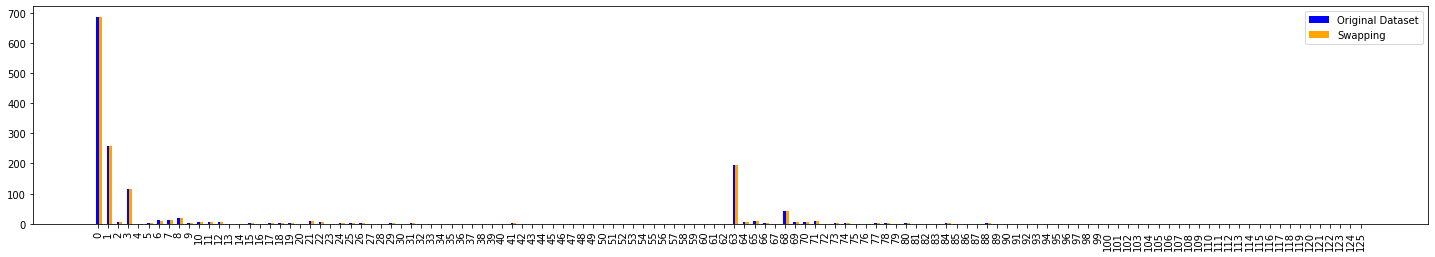

In [118]:
# make_swap2('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.91_a1.csv')
# make_swap2('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.76_a1.csv')
# make_swap2('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.51_a1.csv')
# make_swap2('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.36000000000000004_a1.csv')
# make_swap2('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.11_a1.csv')
# make_swap2('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.01_a1.csv')

make_swap2('alameda', '../swapping/swap_runs/alameda/similar/swap_0.81_0.csv')
make_swap2('alameda', '../swapping/swap_runs/alameda/similar/swap_0.6100000000000001_0.csv')
make_swap2('alameda', '../swapping/swap_runs/alameda/similar/swap_0.41000000000000003_0.csv')
make_swap2('alameda', '../swapping/swap_runs/alameda/similar/swap_0.21000000000000002_0.csv')
make_swap2('alameda', '../swapping/swap_runs/alameda/similar/swap_0.01_0.csv')

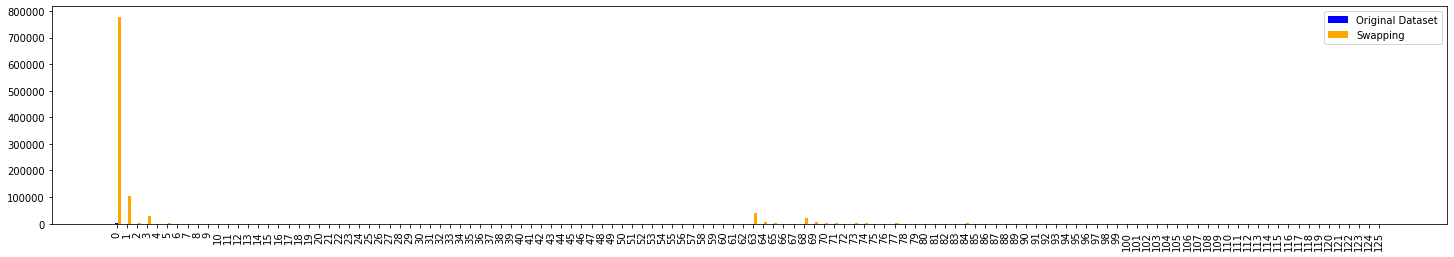

In [112]:
make_swap('armstrong', '../swapping/state_data/pennsylvania.csv')

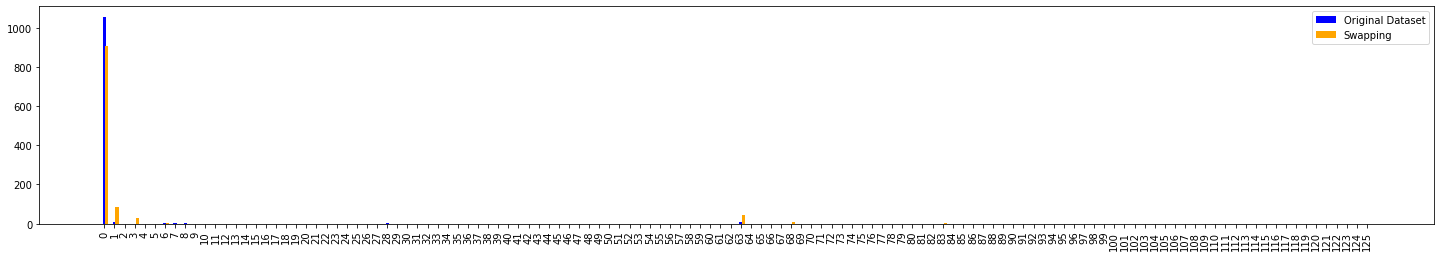

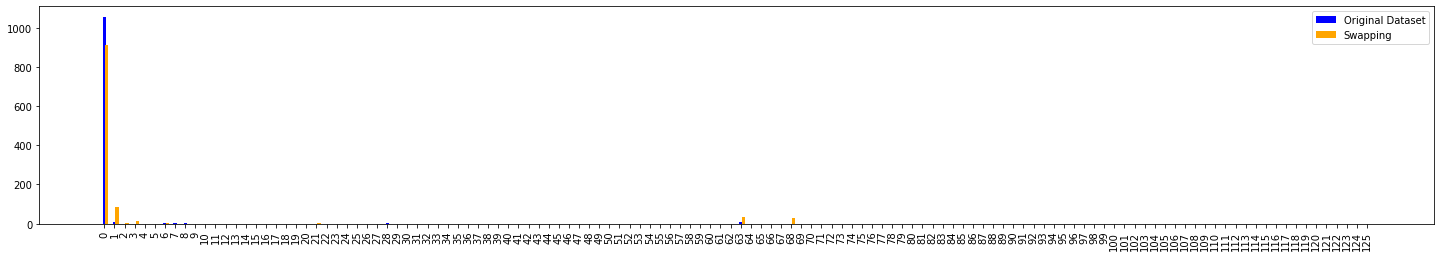

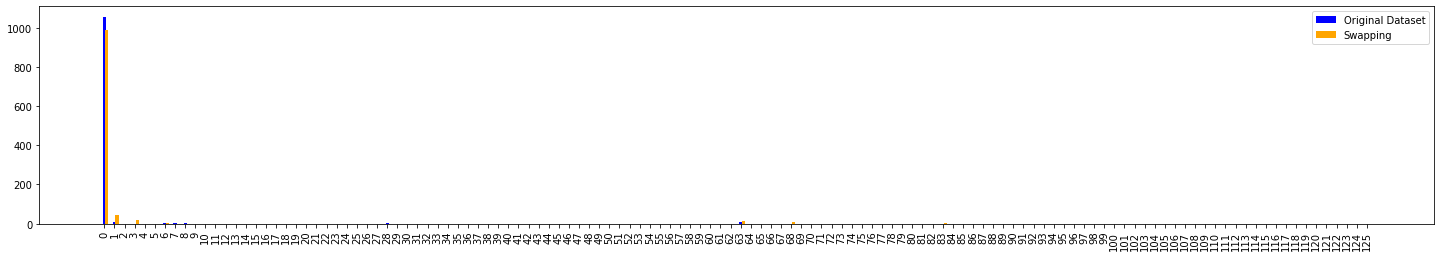

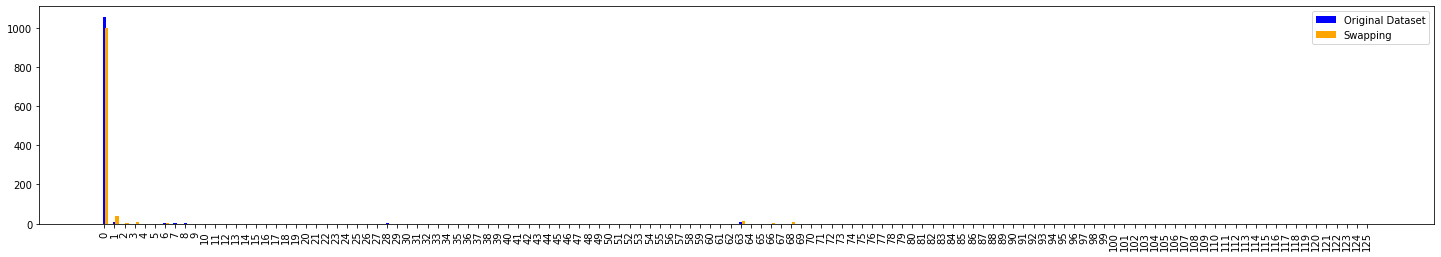

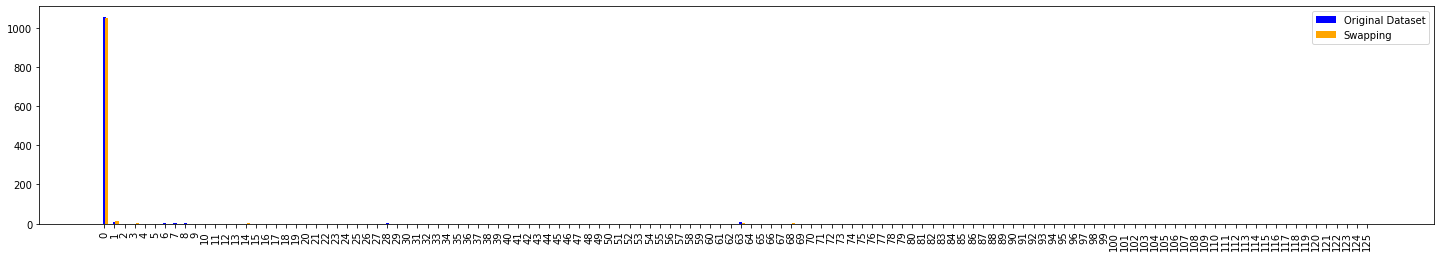

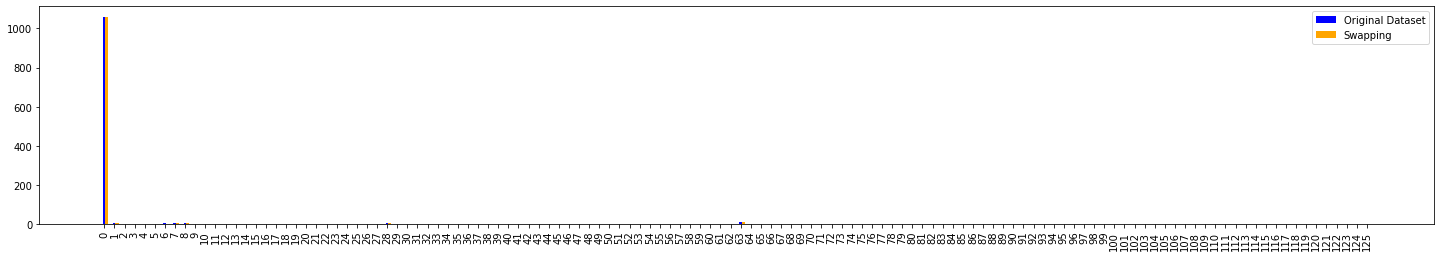

In [114]:
make_swap2('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.91_a1.csv')
make_swap2('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.76_a1.csv')
make_swap2('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.51_a1.csv')
make_swap2('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.36000000000000004_a1.csv')
make_swap2('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.11_a1.csv')
make_swap2('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.01_a1.csv')

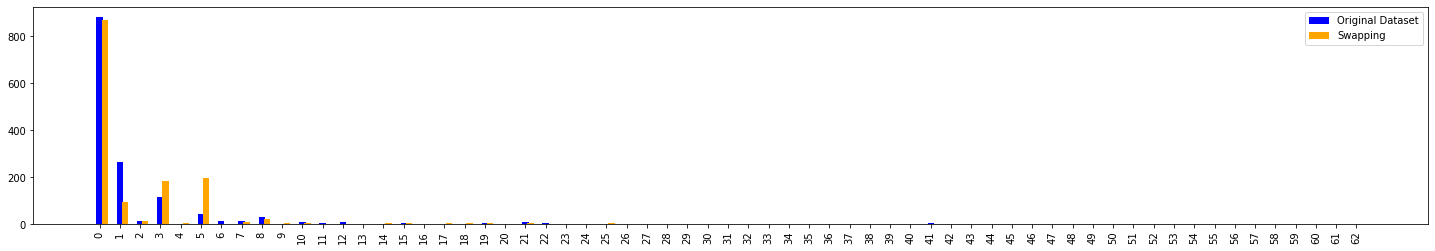

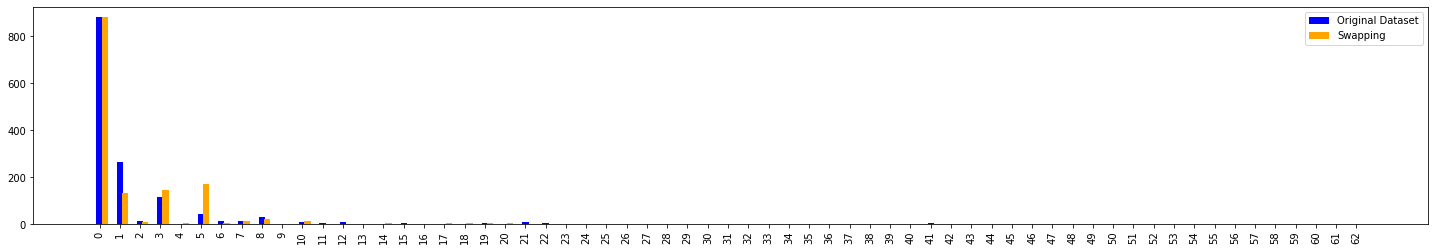

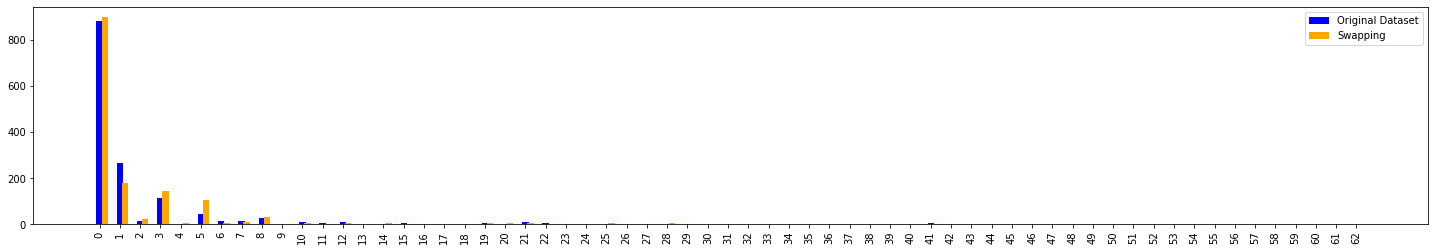

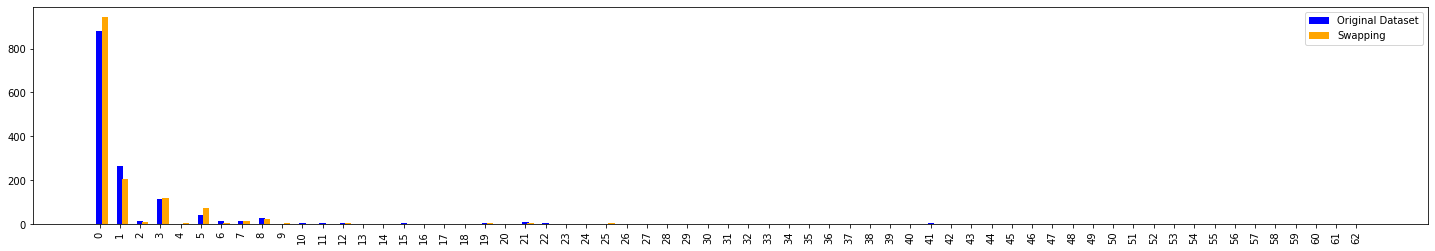

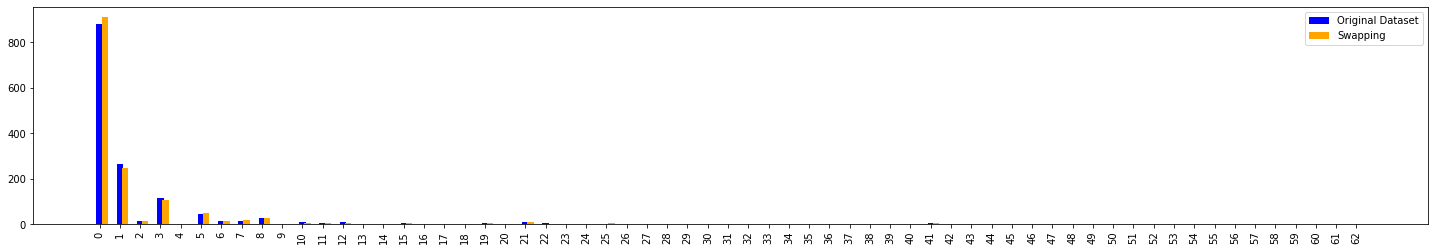

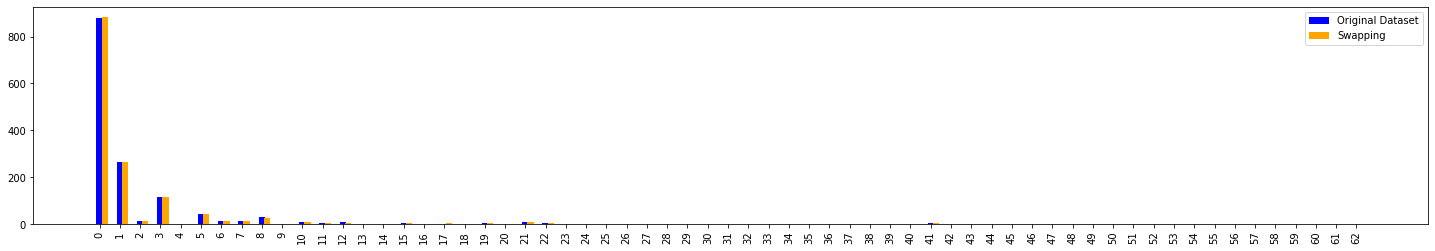

In [64]:
make_swap_raceonly('alameda', '../swapping/swap_runs3/alameda/similar/swap_0.91_a1.csv')
make_swap_raceonly('alameda', '../swapping/swap_runs3/alameda/similar/swap_0.76_a1.csv')
make_swap_raceonly('alameda', '../swapping/swap_runs3/alameda/similar/swap_0.51_a1.csv')
make_swap_raceonly('alameda', '../swapping/swap_runs3/alameda/similar/swap_0.36000000000000004_a1.csv')
make_swap_raceonly('alameda', '../swapping/swap_runs3/alameda/similar/swap_0.11_a1.csv')
make_swap_raceonly('alameda', '../swapping/swap_runs3/alameda/similar/swap_0.01_a1.csv')

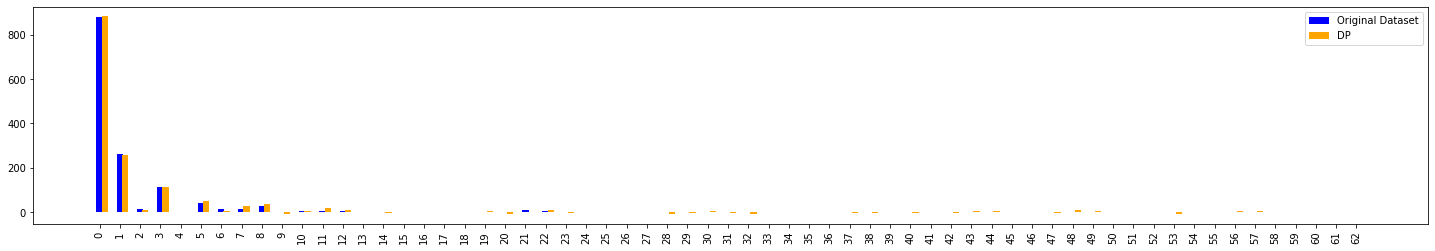

In [93]:

make_dp_raceonly('alameda', '../dp/newdp_runs2/alameda/dprun_0.51_91.csv')
# make_dp_raceonly('alameda', '../dp/newdp_runs2/alameda/dprun_0.96_91.csv')
# make_dp_raceonly('alameda', '../dp/newdp_runs2/alameda/dprun_1.96_91.csv')
# make_dp_raceonly('alameda', '../dp/newdp_runs2/alameda/dprun_3.96_91.csv')
# make_dp_raceonly('alameda', '../dp/newdp_runs2/alameda/dprun_5.96_91.csv')
# make_dp_raceonly('alameda', '../dp/newdp_runs2/alameda/dprun_7.96_91.csv')
# make_dp_raceonly('alameda', '../dp/newdp_runs2/alameda/dprun_9.96_91.csv')

            id                                               race  hispanic
0            1                                        White alone         1
1            2                              Some Other Race alone         1
2            3                                        White alone         0
3            4                                        Asian alone         0
4            5                              Some Other Race alone         1
...        ...                                                ...       ...
999964  999965                    Black or African American alone         0
999965  999966                                        White alone         1
999966  999967                                        White alone         0
999967  999968                                        Asian alone         0
999968  999969  White; Black or African American; American Ind...         1

[999969 rows x 3 columns]
(575883, 3)
            id         race  hispanic
2          